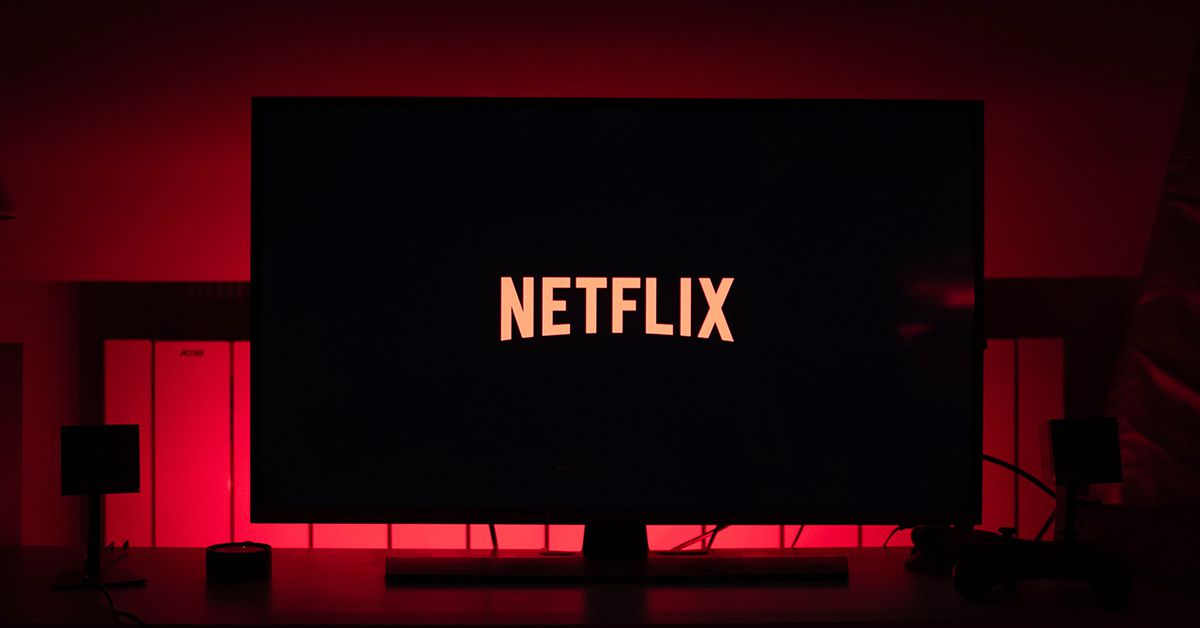

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
dff=pd.read_csv('/kaggle/input/netflix-shows/netflix_titles.csv')
dff.shape

**The data set has 6234 rows and 12 columns.**

In [ ]:
dff.columns

In [ ]:
dff.head()

In [ ]:
import plotly.express as px
z = dff.groupby(['rating']).size().reset_index(name='counts')
pieChart = px.pie(z, values='counts', names='rating', title='Distribution of Content Ratings on Netflix',color_discrete_sequence=px.colors.qualitative.Set3)
pieChart.show()

**This pie chart indicates that majority of content on Netflix is of the rating TV-MA which means it is intended to be be viewed by mature, adult audiences and may be unsuitable for children under 17**

In [ ]:
dff['director']=dff['director'].fillna('No Director Specified')
filtered_directors=pd.DataFrame()
filtered_directors=dff['director'].str.split(',',expand=True).stack()
filtered_directors=filtered_directors.to_frame()
filtered_directors.columns=['Director']
directors=filtered_directors.groupby(['Director']).size().reset_index(name='Total Content')
directors=directors[directors.Director !='No Director Specified']
directors=directors.sort_values(by=['Total Content'],ascending=False)
directorsTop5=directors.head()
directorsTop5=directorsTop5.sort_values(by=['Total Content'])
fig1=px.bar(directorsTop5,x='Total Content',y='Director',title='Top 5 Directors on Netflix')
fig1.show()

**From the data, it is derived that the top 5 Directors on Netflix are Raul Campos, Jan Suter, Jay Karas, Marcus Raboy, Jay Chapman.**

In [ ]:
dff['cast']=dff['cast'].fillna('No Cast Specified')
filtered_cast=pd.DataFrame()
filtered_cast=dff['cast'].str.split(',',expand=True).stack()
filtered_cast=filtered_cast.to_frame()
filtered_cast.columns=['Actor']
actors=filtered_cast.groupby(['Actor']).size().reset_index(name='Total Content')
actors=actors[actors.Actor !='No Cast Specified']
actors=actors.sort_values(by=['Total Content'],ascending=False)
actorsTop5=actors.head()
actorsTop5=actorsTop5.sort_values(by=['Total Content'])
fig2=px.bar(actorsTop5,x='Total Content',y='Actor', title='Top 5 Actors on Netflix')
fig2.show()

**From the data, it is derived that the top 5 Actors on Netflix are Anupam Kher, Om Puri,Shah Rukh Khan, Takahiro Sakurai, Boman Irani.**

In [ ]:
df1=dff[['type','release_year']]
df1=df1.rename(columns={"release_year": "Release Year"})
df2=df1.groupby(['Release Year','type']).size().reset_index(name='Total Content')
df2=df2[df2['Release Year']>=2010]
fig3 = px.line(df2, x="Release Year", y="Total Content", color='type',title='Trend of content produced over the years on Netflix')
fig3.show()

**The line graph shows that there has been a decline in the content produced for both movies and TV shows on Netflix since 2018.**

In [ ]:
from textblob import TextBlob
dfx=dff[['release_year','description']]
dfx=dfx.rename(columns={'release_year':'Release Year'})
for index,row in dfx.iterrows():
    z=row['description']
    testimonial=TextBlob(z)
    p=testimonial.sentiment.polarity
    if p==0:
        sent='Neutral'
    elif p>0:
        sent='Positive'
    else:
        sent='Negative'
    dfx.loc[[index,2],'Sentiment']=sent


dfx=dfx.groupby(['Release Year','Sentiment']).size().reset_index(name='Total Content')

dfx=dfx[dfx['Release Year']>=2010]
fig4 = px.bar(dfx, x="Release Year", y="Total Content", color="Sentiment", title="Sentiment of content on Netflix")
fig4.show()

**The overall positive content is always greater than the neutral and negative content.**
